# Casos de uso modulo: "Analisis exploratorio y estadistica"

# Caso de Uso #1: Analisis de los datos para "Chilean Strong Ground Motion Database" (doi: 10.17603/DS2N30J)
Referencias:
* Bastías N, Montalva GA. Chile Strong Ground Motion Flatfile. Earthquake Spectra. 2016;32(4):2549-2566. doi:10.1193/102715EQS158DP
* Gonzalo A. Montalva; Nicolas Bastias (2017), "Chilean Strong Ground Motion," https://datacenterhub.org/resources/chilean_motion.

El archivo "Data_from_the_Chile_Strong_Ground_Motion_Flatfile_Table_.csv" contiene la metadata y las aceleraciones espectrales de registros sísmicos chilenos. La caracterización de los registros sísmicos se realiza en base a parametros sísmicos como la magnitud, la distancia, propiedades del sitio (Vs30) y el tipo de terremoto (de subducción interplaca o intraplaca).

Por otro lado, los registros sísmicos generan "observaciones" que pueden ser aceleraciones máximas (PGA), velocidades máximas (PGV), aceleraciones espectrales (Sa) para diferentes periodos espectrales, duraciones y la Intensidad de Arias (https://es.wikipedia.org/wiki/Intensidad_de_Arias)

Adicionalmente, los registros estan en componentes horizontales (Norte-Sur y Este-Oeste) y la componente vertical.

In [ ]:
# Importamos librerias para anlisis de los datos ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos'
sns.set(context='paper',style='darkgrid',palette='dark')

In [ ]:
#cargar la base de datos
chSGM_flatfile_pd = pd.read_csv(path+"/Data_from_the_Chile_Strong_Ground_Motion_Flatfile_Table_.csv", low_memory=False)
chSGM_flatfile_pd.head(5)

,ReID,EQID,EvLat [°],EvLon [°],EvDepth [km],Sta,StaLat [°],StaLon [°],Year,Month,Day,Hour,Min,Sec,Mag [Mw],TectEnvi,Vs30 [m/s],TypeVs30,EpiDist [km],HypDist [km],RupDist [km],RupDist_PubliPlane [km],RupDist_CMT [km],RupDist_CSN [km],Azimut [°],Comp,Freq LowCut [Hz],Freq HighCut [Hz],PGA [cm/sec2],PGV [cm/sec2],Sa0.01 [cm/sec2],Sa0.015 [cm/sec2],Sa0.02 [cm/sec2],Sa0.025 [cm/sec2],Sa0.03 [cm/sec2],Sa0.035 [cm/sec2],Sa0.04 [cm/sec2],Sa0.045 [cm/sec2],Sa0.05 [cm/sec2],Sa0.055 [cm/sec2],...,Sa0.1 [cm/sec2],Sa0.15 [cm/sec2],Sa0.2 [cm/sec2],Sa0.25 [cm/sec2],Sa0.3 [cm/sec2],Sa0.35 [cm/sec2],Sa0.4 [cm/sec2],Sa0.45 [cm/sec2],Sa0.5 [cm/sec2],Sa0.55 [cm/sec2],Sa0.6 [cm/sec2],Sa0.65 [cm/sec2],Sa0.7 [cm/sec2],Sa0.75 [cm/sec2],Sa0.8 [cm/sec2],Sa0.85 [cm/sec2],Sa0.9 [cm/sec2],Sa1 [cm/sec2],Sa1.5 [cm/sec2],Sa2 [cm/sec2],Sa2.5 [cm/sec2],Sa3 [cm/sec2],Sa3.5 [cm/sec2],Sa4 [cm/sec2],Sa4.5 [cm/sec2],Sa5 [cm/sec2],Sa5.5 [cm/sec2],Sa6 [cm/sec2],Sa6.5 [cm/sec2],Sa7 [cm/sec2],Sa7.5 [cm/sec2],Sa8 [cm/sec2],Sa8.5 [cm/sec2],Sa9 [cm/sec2],Sa10 [cm/sec2],AriasIntensity [m/s],TotalDuration [sec],SignificantDuration [sec],BracketedDuration [sec],Unnamed: 86
0,20001,50001,-33.24,-71.85,33.0,BIOB01S,-36.597200,-72.115000,1985,3,3,22,47,40,7.9,interface,358,3,373.230892,374.686935,223.8073576,223.8073576,228.26,313.705,183.644626,NS,0.020000,30,57.418361,9.252022,57.418576,57.522596,57.521260,58.144574,58.499834,60.539640,59.702911,59.880644,60.313922,59.316051,...,65.851097,64.198947,98.39504174,103.0718902,108.4614319,147.4018691,121.7426621,156.9503964,138.6894971,149.4095507,149.6249625,150.2197692,117.6070005,107.407811,126.1158299,144.0137845,190.9793742,167.9460035,83.49739415,72.12942842,59.00602799,40.72865645,25.02723606,27.29514381,30.26061495,20.01220421,15.04407776,11.19964391,9.066742506,6.827960747,4.991100526,3.677903166,2.817523692,2.341851121,1.775619458,14.096820,43.15,31.895,6.660,NaN
1,20001,50001,-33.24,-71.85,33.0,BIOB01S,-36.597200,-72.115000,1985,3,3,22,47,40,7.9,interface,358,3,373.230892,374.686935,223.8073576,223.8073576,228.26,313.705,183.644626,EW,0.152950,30,53.741695,9.212473,53.741848,53.822559,54.045255,54.990971,55.086089,54.861185,56.508122,56.029745,57.073021,57.839739,...,54.326946,71.924124,83.23460668,88.87518985,102.4509063,139.9671125,117.8870499,129.6638891,144.8763873,183.9267958,172.8353613,153.4951123,192.8015188,207.1127239,183.2083514,169.69992,172.4512847,104.5828095,89.29129185,64.75023372,48.89776737,33.05734075,34.31661275,36.3657592,32.91661536,15.34068304,-,-,-,-,-,-,-,-,-,12.685588,43.15,32.440,0.000,NaN
2,20001,50001,-33.24,-71.85,33.0,BIOB01S,-36.597200,-72.115000,1985,3,3,22,47,40,7.9,interface,358,3,373.230892,374.686935,223.8073576,223.8073576,228.26,313.705,183.644626,Z,0.020000,30,33.745977,7.287248,33.745989,33.763427,33.980791,34.191450,35.340061,34.931070,36.974458,38.212366,35.264245,35.191844,...,42.078435,48.608003,41.62705981,58.65863143,57.00049915,50.03825199,83.66899661,89.23949952,94.8960701,64.28871545,67.01846778,58.54792057,87.22214775,83.31292363,95.34076717,91.82453303,103.082577,103.601349,64.93533547,40.96808398,36.22474054,25.28210593,21.66808041,18.73677951,14.15158991,11.64811379,8.392142188,7.001954596,5.82483046,4.817570201,3.919283218,3.410193033,3.142381262,2.951690079,2.340623559,5.076750,43.15,28.535,0.000,NaN
3,20002,50001,-33.24,-71.85,33.0,RANC01S,-33.941944,-71.736944,1985,3,3,22,47,40,7.9,interface,108,3,78.560264,85.209830,32.88862485,32.88862485,35.71,43.085,172.354470,NS,0.171294,50,244.068850,8.651690,244.105949,268.737927,303.212077,281.208638,317.893279,286.389921,289.442911,280.073578,265.549971,226.038753,...,477.188935,395.789596,325.2044443,417.2974188,377.4961152,260.1927896,329.876693,205.7728354,289.4378017,178.7691914,123.800071,130.7068726,101.0241377,108.5579111,113.5846646,130.7547142,114.5426091,143.0955706,66.7634275,39.81964895,31.5985632,12.25445504,9.526614966,6.236473242,4.075578967,-,-,-,-,-,-,-,-,-,-,40.131986,91.74,23.045,25.145,NaN
4,20002,500



---



Explorar la cantidad de datos por tipo de terremoto

In [ ]:
#Determinar la cantidad de registros por tipo de terremoto

TectEnviro = 'interface'
#filter per tectonic enviroment
isTectonic = chSGM_flatfile_pd['TectEnvi'] == TectEnviro
chSGM_filter_flatfile = chSGM_flatfile_pd[isTectonic]
# chSGM_filter_flatfile.head()
print(f'Son {len(chSGM_filter_flatfile)} registros de subducción interplaca')

TectEnviro = 'inslab'
#filter per tectonic enviroment
isTectonic = chSGM_flatfile_pd['TectEnvi'] == TectEnviro
chSGM_filter_flatfile = chSGM_flatfile_pd[isTectonic]
# chSGM_filter_flatfile.head()
len(chSGM_filter_flatfile)
print(f'Son {len(chSGM_filter_flatfile)} registros de subducción intraplaca')


Son 6678 registros de subducción interplaca
Son 3900 registros de subducción intraplaca




---



Graficar comportamiento de las intensidades sísmicas con respecto la distancia

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


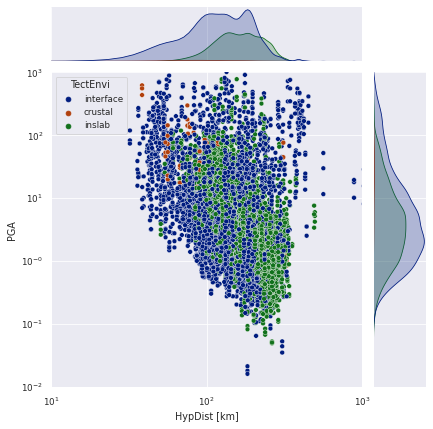

In [ ]:
#graficar distancia con la aceleración máxima (PGA)

chSGM_flatfile_pd['LogPGA'] = np.log10(chSGM_flatfile_pd['PGA [cm/sec2]'])

g = sns.jointplot(x='HypDist [km]', y ='LogPGA' , data=chSGM_flatfile_pd, hue = 'TectEnvi', legend=True)

g.ax_joint.set_xscale('log')
# g.ax_joint.set_yscale('log')

g.ax_joint.set_xlim(10, 1000)
g.ax_joint.set_ylim(-2, 3)

g.ax_joint.set_yticklabels(['$10^{-2}$', '$10^{-1}$', '$10^{-0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$'])
g.ax_joint.set_ylabel('PGA')

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


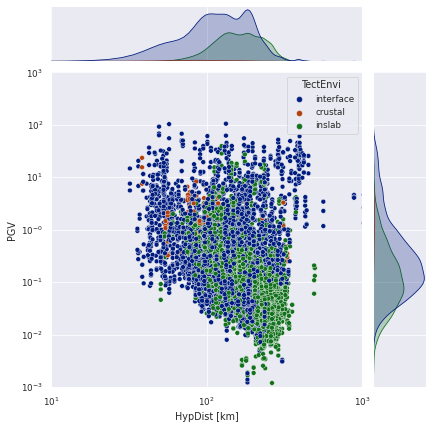

In [ ]:
#graficar distancia con la velocidad máxima (PGV)

chSGM_flatfile_pd['LogPGV'] = np.log10(chSGM_flatfile_pd['PGV [cm/sec2]'])

g = sns.jointplot(x='HypDist [km]', y ='LogPGV' , data=chSGM_flatfile_pd, hue = 'TectEnvi', legend=True)

g.ax_joint.set_xscale('log')
# g.ax_joint.set_yscale('log')

g.ax_joint.set_xlim(10, 1000)
g.ax_joint.set_ylim(-3, 3)

g.ax_joint.set_yticklabels(['$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{-0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$'])
g.ax_joint.set_ylabel('PGV')

plt.show()

_Conclusión_ : Como es de esperar las intensidades sísmicas (e.g., PGA) disminuyen con distancia.



---





Evaluar la correlación entre aceleraciones espectrales en terremotos de subducción interplaca


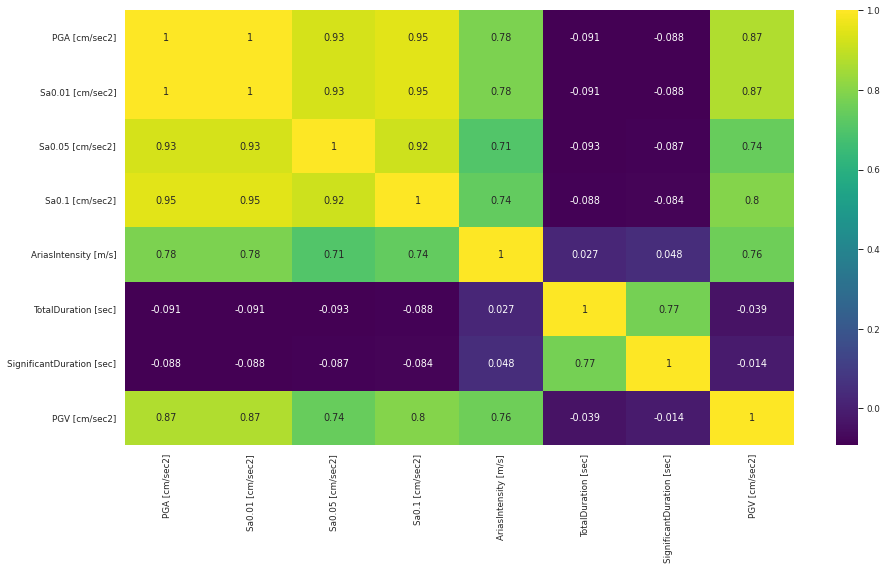

In [ ]:
TectEnviro = 'interface'

#filter per tectonic enviroment
isTectonic = chSGM_flatfile_pd['TectEnvi'] == TectEnviro
chSGM_filter_flatfile = chSGM_flatfile_pd[isTectonic]
# chSGM_filter_flatfile.head()
# len(chSGM_filter_flatfile)

fig, ax = plt.subplots(1,1, figsize=(15,8))
                       
corr = chSGM_filter_flatfile[['PGA [cm/sec2]','Sa0.01 [cm/sec2]','Sa0.05 [cm/sec2]','Sa0.1 [cm/sec2]','AriasIntensity [m/s]',
                              'TotalDuration [sec]','SignificantDuration [sec]','PGV [cm/sec2]']].corr()

sns.heatmap(corr,annot=True, cmap='viridis') #Generamos el heatmap anotado
plt.show()


_Conclusión_: Las aceleraciones espectrales estan correlacionadas de forma positiva entre si, al igual que la Intensidad de Arias, la velocidad máxima del suelo (PGV) y la aceleración máxima del suelo (PGA). Las excepciones en la correlación se producen con las duraciones del registros sísmico, que practicamente no tienen correlación con los otros parametros sísmicos ($\rho$~0).



---



Posteriormente, se analiza la correlación de los parametros sísmicos con variables predictoras de intensidad sísmica, como seria la magnitud, distancia y propiedades del suelo. 

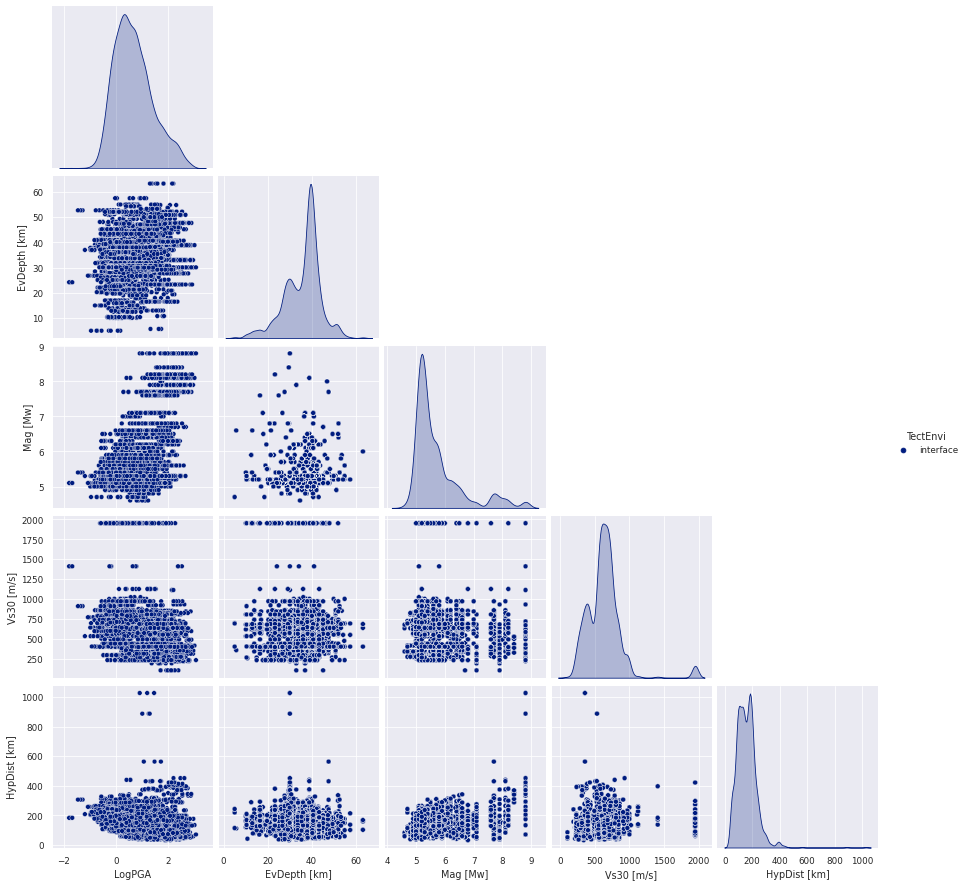

In [ ]:
sns.pairplot(data=chSGM_filter_flatfile[['LogPGA','EvDepth [km]','Mag [Mw]','Vs30 [m/s]','HypDist [km]','TectEnvi']], corner=True, hue='TectEnvi')
plt.show()

In [ ]:
chSGM_filter_flatfile[['LogPGA','EvDepth [km]','Mag [Mw]','Vs30 [m/s]','HypDist [km]','TectEnvi']].corr()

,LogPGA,EvDepth [km],Mag [Mw],Vs30 [m/s],HypDist [km]
LogPGA,1.000000,0.023023,0.646124,-0.207316,-0.259859
EvDepth [km],0.023023,1.000000,-0.144906,-0.052513,-0.102537
Mag [Mw],0.646124,-0.144906,1.000000,-0.077478,0.328268
Vs30 [m/s],-0.207316,-0.052513,-0.077478,1.000000,0.096338
HypDist [km],-0.259859,-0.102537,0.328268,0.096338,1.000000


_Conclusión_: De acuerdo a los graficos y las correlaciones (y cumpliendo con la fisica del problema), se tiene que:
* La correlación es directa con la magnitud, es decir, mayores magnitudes producen mayores aceleraciones en el suelo.
* La correlación es inversa con el tipo de suelo, es decir, suelo más rigidos producen menores aceleraciones en el suelo.
* La correlación es inversa con la distancia, es decir, mientras más lejos se producen menores aceleraciones en suelo.
* La correlación es practicamente con la profundidad del evento sísmico.



---



Finalmente, analizemos con la duración del evento sismico

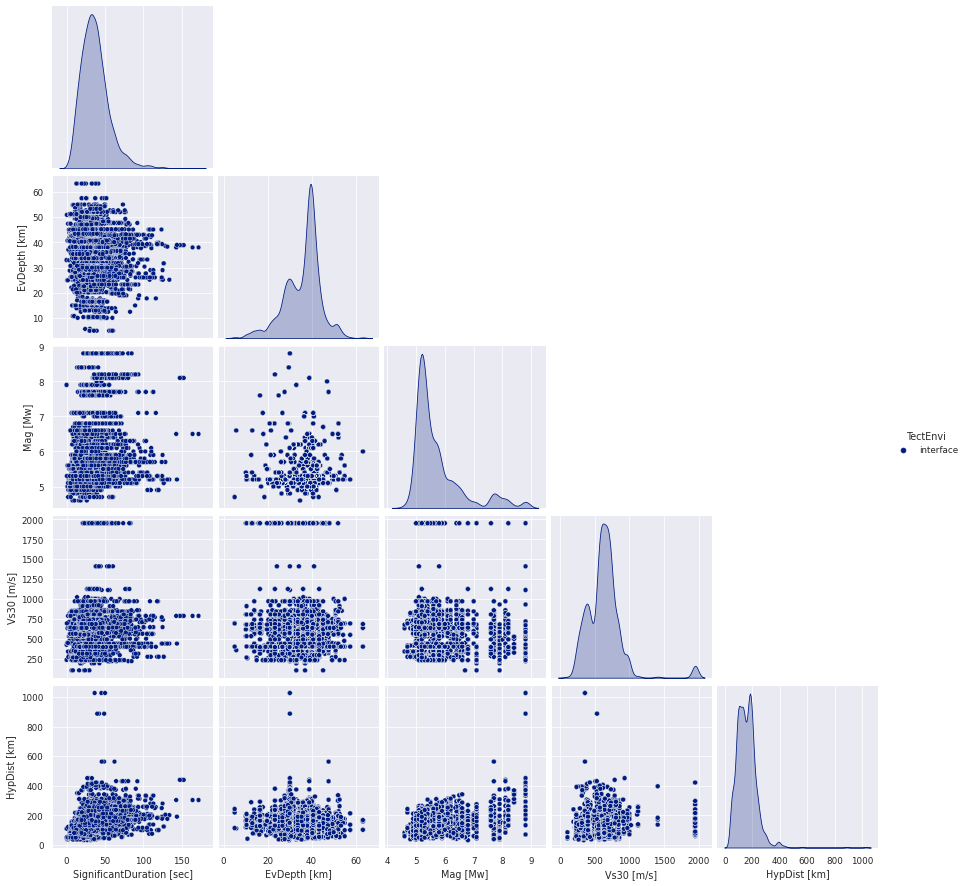

In [ ]:
sns.pairplot(data=chSGM_filter_flatfile[['SignificantDuration [sec]','EvDepth [km]','Mag [Mw]','Vs30 [m/s]','HypDist [km]','TectEnvi']], corner=True, hue='TectEnvi')
plt.show()

In [ ]:
chSGM_filter_flatfile[['SignificantDuration [sec]','EvDepth [km]','Mag [Mw]','Vs30 [m/s]','HypDist [km]','TectEnvi']].corr()

,SignificantDuration [sec],EvDepth [km],Mag [Mw],Vs30 [m/s],HypDist [km]
SignificantDuration [sec],1.000000,-0.082883,0.129262,0.108038,0.490966
EvDepth [km],-0.082883,1.000000,-0.144906,-0.052513,-0.102537
Mag [Mw],0.129262,-0.144906,1.000000,-0.077478,0.328268
Vs30 [m/s],0.108038,-0.052513,-0.077478,1.000000,0.096338
HypDist [km],0.490966,-0.102537,0.328268,0.096338,1.000000


Conclusión: De acuerdo a los graficos y las correlaciones, se tiene que:

* La correlación es directa pero pequeña ($\rho = 0.13$) con la magnitud, es decir, mayores magnitudes producen terremotos de mayores duraciones.
* La correlación es directa pero pequeña ($\rho = 0.11$) con el tipo de suelo, es decir, suelo más blandos producen mayores duraciones de terremotos.
* La correlación es directa con la distancia (la más significativa de las variables analizadas, $\rho = 0.5$), es decir, mientras más lejos el registro del terremoto dura más (pero tiene menor aceleración máxima del suelo).
* La correlación es practicamente con la profundidad del evento sísmico.



---



# Caso de Uso #2:  Analizar el movimiento de carga desde Chile a diferentes paises y puertos.



In [ ]:
# Importamos librerias para anlisis de los datos ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
despachos_path = '/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos'
despachos_df = pd.read_csv(despachos_path + 'Despachos2021.csv', sep=';', encoding='latin-1')

despachos_df.head(5)


,Pais,Puerto,Ancho,Alto,Semana,Enviado,Cantidad
0,CHILE,LAMPA,28.0,80.0,1,06-01-2021,1320
1,CHILE,LAMPA,28.0,80.0,1,08-01-2021,2200
2,CHILE,LAMPA,31.0,80.0,1,08-01-2021,660
3,ARGENTINA,BUENOS AIRES,30.0,80.0,1,08-01-2021,3300
4,ARGENTINA,BUENOS AIRES,30.0,80.0,1,08-01-2021,3300


In [ ]:
despachos_df.dtypes

Pais         object
Puerto       object
Ancho       float64
Alto        float64
Semana        int64
Enviado      object
Cantidad      int64
dtype: object

In [ ]:
despachos_df.describe()

,Ancho,Alto,Semana,Cantidad
count,4689.000000,4687.000000,4719.000000,4719.000000
mean,30.385157,81.009601,16.912058,1313.585929
std,4.237117,1.749493,9.579574,1710.952071
min,16.000000,80.000000,1.000000,4.000000
25%,28.000000,80.000000,9.000000,235.000000
50%,30.000000,80.000000,16.000000,880.000000
75%,34.000000,84.000000,25.000000,1760.000000
max,40.000000,96.000000,34.000000,28160.000000


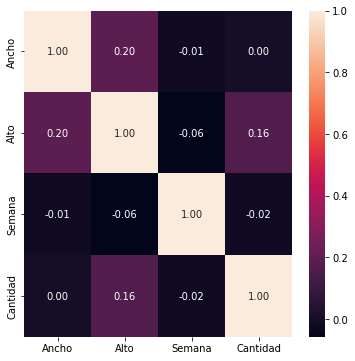

In [ ]:

plt.figure(figsize=(6,6))
sns.heatmap(despachos_df.corr(), annot=True, fmt='.2f') 
plt.show()


Los datos tienen mala correlación, dificilmente se podria inferir algo de ellos

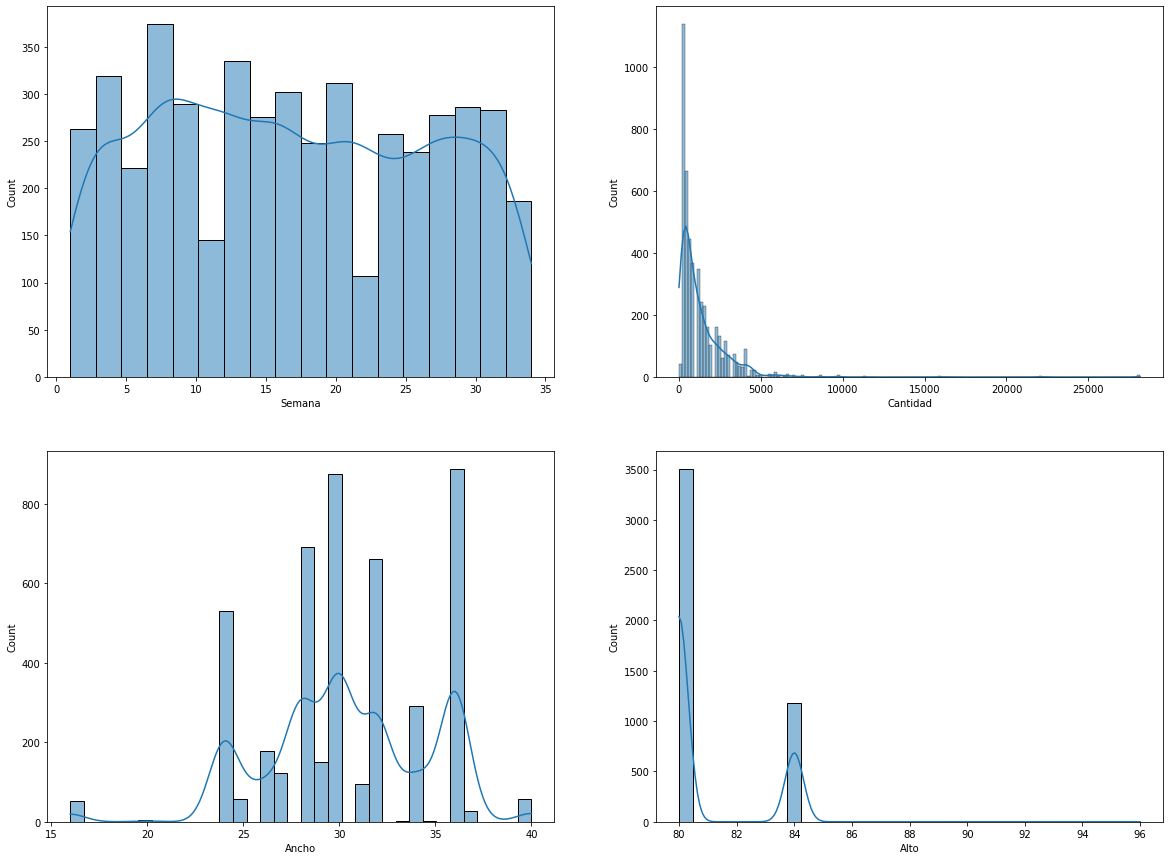

In [ ]:

fig, ax = plt.subplots(2,2, figsize=(20,15) )
#subplots con el método histplot y el gráfico de KDE
sns.histplot(x='Semana', data = despachos_df, kde=True, ax = ax[0,0])
sns.histplot(x='Cantidad', data = despachos_df, kde=True, ax = ax[0,1])
sns.histplot(x='Ancho', data = despachos_df, kde=True, ax = ax[1,0])
sns.histplot(x='Alto', data = despachos_df, kde=True, ax = ax[1,1])
plt.show()

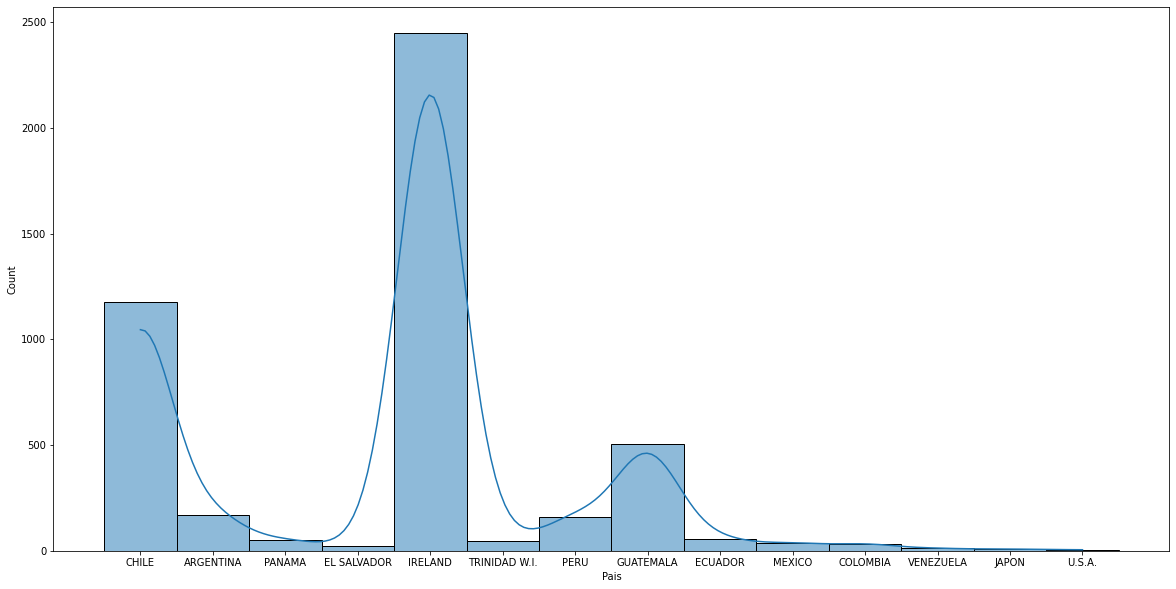

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,10) )
sns.histplot(x='Pais', data = despachos_df, kde=True, ax = ax)
plt.show()

Analizar los datos de Chile, Irlanda y Guatemala.

In [ ]:
#Separa los tres paises con mas movimiento
despachos_a = despachos_df.loc[(despachos_df['Pais'] == 'CHILE') | (despachos_df['Pais'] == 'IRELAND')  | (despachos_df['Pais'] == 'GUATEMALA') ]  




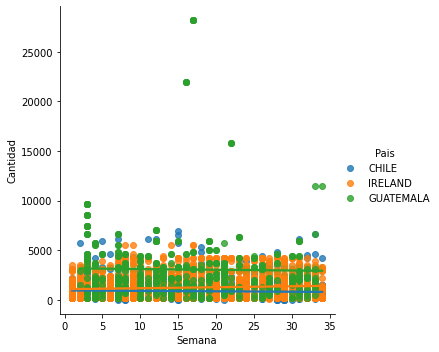

In [ ]:
sns.lmplot(data=despachos_a, x='Semana', y='Cantidad', hue="Pais")
plt.show()

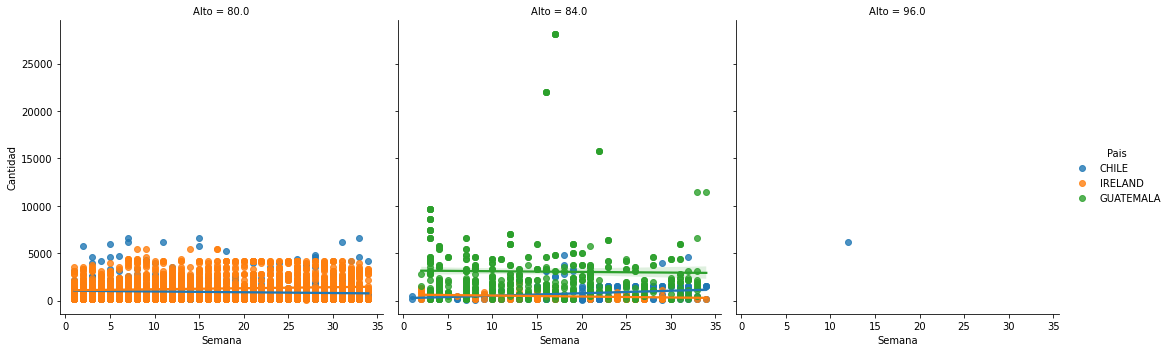

In [ ]:
sns.lmplot(data=despachos_a, x='Semana', y='Cantidad', hue="Pais", col="Alto")
plt.show()


Los items con altura 80 se envian principalmente a Irlanda y los de 84 a Guatemala.



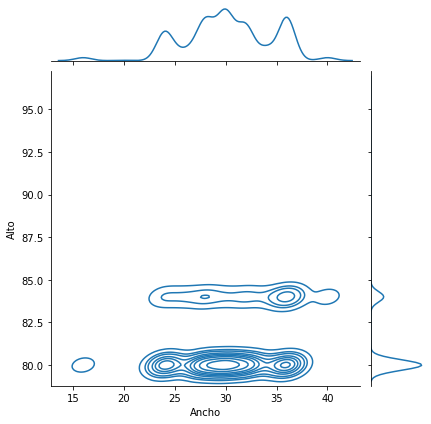

In [ ]:
sns.jointplot(data=despachos_a, x='Ancho', y='Alto', kind="kde")
plt.show()

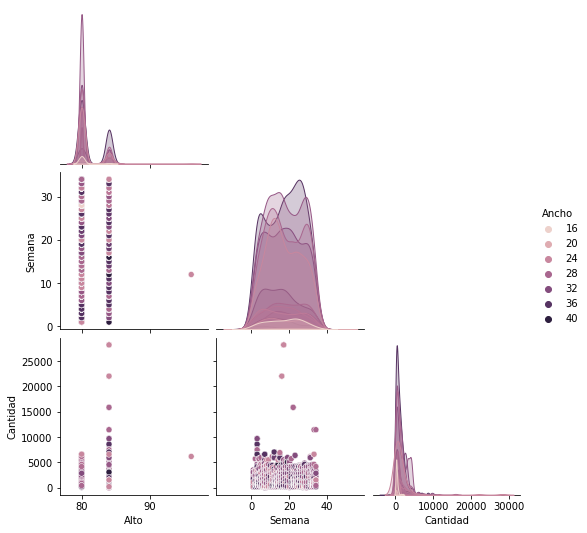

In [ ]:
sns.pairplot(data=despachos_a, corner=True, hue='Ancho')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


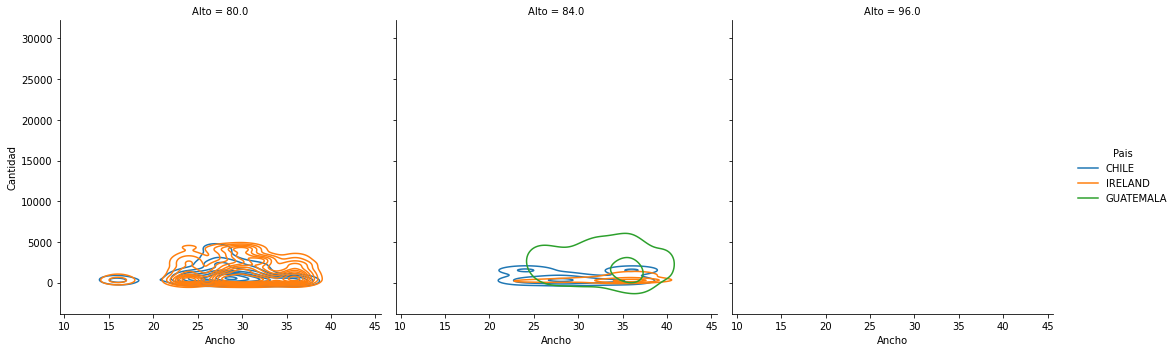

In [ ]:
sns.displot(data=despachos_a, x="Ancho", y="Cantidad", hue="Pais", col="Alto", kind="kde");
plt.show()

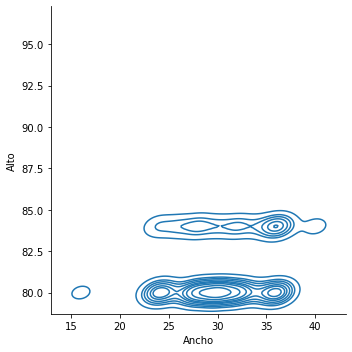

In [ ]:
sns.displot(data=despachos_a, x="Ancho", y="Alto", kind="kde");
plt.show()

los datos por si solos no son insuficientes para hacer alguna estimación significativa, se requiere atributos adicionales de cada envio para mejorar el analisis. 

# Caso de uso #3: 
El propósito de este proyecto es facilitar el uso de sklearn en términos generales, en este caso solo permite modificar un poco la base de datos, eliminando las columnas que se consideren innecesarias segun la matriz de Pearson.

El objetivo a largo plazo es escoger varios métodos de sklearn con la base modificada e ir probando cual entrega mejores resultados, en este caso, solo se entrena con K_means modificando las variables basicas y muestra la matriz de confusion en cada uno de los resultados para mostrar detalles.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
database = pd.read_csv('Cellphone.csv', sep=';')

database["DataUsage"] = database.DataUsage.astype(str)
database['DataUsage'] = database['DataUsage'].apply(lambda x: str(x.replace(',','.')))
database["DataUsage"] = database.DataUsage.astype(float)

database["DayMins"] = database.DayMins.astype(str)
database['DayMins'] = database['DayMins'].apply(lambda x: str(x.replace(',','.')))
database['DayMins'] = database.DayMins.astype(float)

database["MonthlyCharge"] = database.MonthlyCharge.astype(str)
database['MonthlyCharge'] = database['MonthlyCharge'].apply(lambda x: str(x.replace(',','.')))
database["MonthlyCharge"] = database.MonthlyCharge.astype(float)

database["AverageFee"] = database.AverageFee.astype(str)
database['AverageFee'] = database['AverageFee'].apply(lambda x: str(x.replace(',','.')))
database["AverageFee"] = database.AverageFee.astype(float)

database["RoamMins"] = database.RoamMins.astype(str)
database['RoamMins'] = database['RoamMins'].apply(lambda x: str(x.replace(',','.')))
database["RoamMins"] = database.RoamMins.astype(float)

database["DayCalls"] = database.DayCalls.astype(str)
database['DayCalls'] = database['DayCalls'].apply(lambda x: str(x.replace(',','.')))
database["DayCalls"] = database.DayCalls.astype(float)

database = database.fillna(database.mean())

In [ ]:
def column_delete(df):
    print('Cual columna desea eliminar? \n')
    cols = df.columns
    i = 0
    for col in df.columns:
        print(f'{i} - {col}')
        i = i + 1
    try:
        target = int(input('\n Escriba el numero de la columna que desea eliminar, cualquier valor extra para salir.'))
    except:
        return df
    df.drop(df.columns[target], axis=1, inplace=True)
    column_delete(df)

def column_y(df):
    print('Selecciona la columna Y, estas son las columnas de su base de datos\n')
    i = 0
    for col in database.columns:
        print(f'{i} - {col}')
        i = i + 1
    op_2 = int(input())
    y = df.iloc[:, op_2]
    X = df
    X.drop(X.columns[op_2], axis=1, inplace=True)
    return X, y

def pearson(df):
    plt.figure(figsize=(14,12))
    plt.title('Correlacion de pearson', size = 15)
    colormap = sns.diverging_palette(10, 220, as_cmap = True)
    sns.heatmap(df.corr(),
                square = True,
                annot = True,
                linewidths=0.1,vmax=1.0, linecolor='white',
                annot_kws={'fontsize':12 })
    plt.show()

def analisis(X_train, X_test, y_train, y_test,n):
    results = cross_validate(KNeighborsRegressor(),X,y,return_train_score=True,cv=5)
    print(results)
    print('')
    train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                             X,
                                             y,
                                             param_name='n_neighbors',
                                             param_range=n,
                                             cv=5)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    k_range = n
    scores_train = []
    scores_test = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        scores_train.append(round(knn.score(X_train, y_train),3))
        scores_test.append(round(knn.score(X_test, y_test),3))
        print(f'Prueba con un valor de n de {k}')
        print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
        print('Accuracy of K-NN classifier on test set: {:.2f} \n'.format(knn.score(X_test, y_test)))

    print(f'Puntajes en base al conjunto de entrenamiento{scores_train}\n')
    print(f'Puntajes en base al conjunto de prueba{scores_test}\n')

    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.scatter(k_range, scores_test)
    plt.xticks(k_range)
    
    max_value = max(scores_train)
    max_index = scores_train.index(max_value)
    print(f'El puntaje {max_value} en "Conjunto de entrenamiento" corresponde al valor k =  {max_index + 1} .')
    
    max_value = max(scores_test)
    max_index = scores_test.index(max_value)
    print(f'El puntaje {max_value} en "Conjunto de prueba" corresponde al valor k =  {max_index + 1} .')


Agregue el minimo de K: 
1
Agregue el maximo de K: 
15
{'fit_time': array([0.0030086 , 0.00300717, 0.00198793, 0.00300717, 0.00301409]), 'score_time': array([0.00301456, 0.00200677, 0.00201344, 0.00200057, 0.00198722]), 'test_score': array([-0.23360555,  0.20710791,  0.19348027,  0.05581053,  0.15556694]), 'train_score': array([0.48671865, 0.47340733, 0.46782705, 0.46923099, 0.46181091])}

Prueba con un valor de n de 1
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.80 

Prueba con un valor de n de 2
Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.83 

Prueba con un valor de n de 3
Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.84 

Prueba con un valor de n de 4
Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.84 

Prueba con un valor de n de 5
Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-N

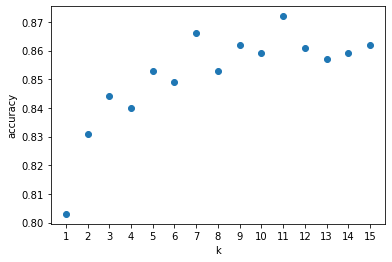

In [ ]:
print('Bienvenido')
print('Estas son las columnas de su base de datos \n')
for col in database.columns:
    print(col)
print('''\n Que desea hacer?
          1 - Eliminar columnas
          any - Continuar''')

pearson(database) # objetivo: es eliminar todas las columnas que segun la matriz de Pearson no sean relevantes para "Cancelar"

# Eliminar todas las columnas innecesarias, en este caso, 11, 10, 8, 7, 4, 3 y 1 {Este paso se puede automatizar}
op_1 = input()
if op_1 == '1':
    column_delete(database)
    
# Clear_output es para evitar que la consola se llene.
clear_output(wait=True)

# Seleccion de eje Y
X, y = column_y(database)

clear_output(wait=True)

# Seleccion del minimo K y maximo K
a = int(input('Agregue el minimo de K: \n'))
b = int(input('Agregue el maximo de K: \n'))
n = np.arange(a,b+1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
analisis(X_train, X_test, y_train, y_test, n)

#Caso de Uso #4: Dependencia de la cantidad de entradas vendidas en el cine respecto al valor del boleto
Considerando el mercado cinematográfico de América del Norte (consistente en los Estados Unidos, Canadá, Puerto Rico y Guam), verificar si la cantidad de boletos de cine depende de su valor.

fuente: https://www.kaggle.com/johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021?select=AnnualTicketSales.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [ ]:
# Montar Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos'
ticket_df = pd.read_csv(path+"/AnnualTicketSales.csv")

ticket_df.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [ ]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 27 non-null     int64  
 1   TICKETS SOLD                         27 non-null     object 
 2   TOTAL BOX OFFICE                     27 non-null     object 
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object 
 4   AVERAGE TICKET PRICE                 27 non-null     object 
 5   Unnamed: 5                           0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ KB


In [ ]:
# Función para ajustar los parametros de regresión lineal

def rl_coef(x, y):
  x_min_mx = x - np.mean(x)  # x minus mean(x)
  y_min_my = y - np.mean(y)  # y minus mean(y)

  beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
  beta_0 = np.mean(y) - (beta_1 * np.mean(x))

  return beta_1, beta_0

In [ ]:
# Función para aplicar la forma de la regresión lineal

def lin_reg_coef(x, beta_1, beta_0): 
    y_hat = (beta_1 * x) + beta_0  
    return y_hat

In [ ]:
# Función para obtener MAPE

def mean_absolute_percentage_error(y, y_hat):
  mape = np.sum(np.abs((y - y_hat)/y)) / len(y)
  return mape

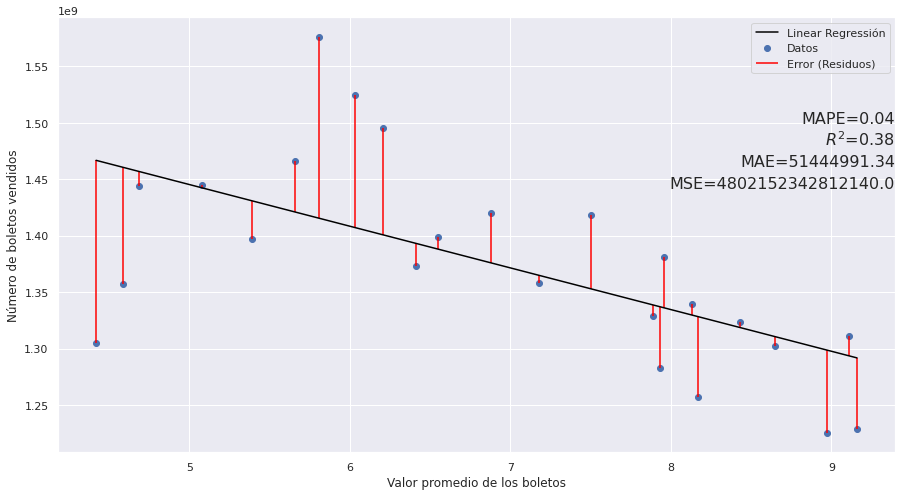

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

y_mod = ticket_df['TICKETS SOLD'].values
x_mod = ticket_df['AVERAGE TICKET PRICE'].values
x_d = []
y_d = []

# Cambiar formato de datos a número para trabajar en ellos
for i in range(2,len(x_mod)-1):
   x_d.append(float(x_mod[i].replace("$","")))

for i in range(2,len(y_mod)-1):
   y_d.append(int(y_mod[i].replace(",","")))

# Cambiar tipo de dato a <class 'numpy.ndarray'>
y= (np.asarray(y_d)).flatten()
x= (np.asarray(x_d)).flatten()

beta_1, beta_0 = rl_coef(x, y)


fig, ax = plt.subplots(1,1, figsize=(15,8))
ax.plot(x,lin_reg_coef(x, beta_1,beta_0), color="black", label="Linear Regressión") 
ax.scatter(x,y, label="Datos")

ax
ax.vlines(x, y, lin_reg_coef(x, beta_1,beta_0), color="red", label="Error (Residuos)") #Gráficamos los Errores en cada punto. 
plt.ylabel('Número de boletos vendidos')
plt.xlabel('Valor promedio de los boletos')

mse = mean_squared_error(y , lin_reg_coef(x, beta_1,beta_0)) 
mae = mean_absolute_error(y , lin_reg_coef(x, beta_1,beta_0)) 
r2= r2_score(y , lin_reg_coef(x, beta_1,beta_0))
mape = mean_absolute_percentage_error(y , lin_reg_coef(x, beta_1,beta_0)) 

plt.annotate(s = f'MSE={np.round(mse,2)}', xy = (1,1), 
             xytext = (1,0.6), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)
plt.annotate(s = f'MAE={np.round(mae,2)}', xy = (1,1), 
             xytext = (1,0.65), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)
plt.annotate(s = f'$R^2$={np.round(r2,2)}', xy = (1,1), 
             xytext = (1,0.7), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)
plt.annotate(s = f'MAPE={np.round(mape,2)}', xy = (1,1), 
             xytext = (1,0.75), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)

plt.legend()
plt.show()


Conclusiones:

* Con $R^2$ = 0.38 , es decir, considerando una regresión lineal simple, ésta es capaz de explicar el 38% de la variabilidad del comportamiento del número de boletos vendidos.
* Dado que el MAPE es 0.04, existe en promedio un 4% de error entre el valor real y el estimado (importante considerar que MAPE se indefine para valores de $y_i = 0$, por lo mismo, no es una métrica comúnmente utilizada).
* MSE es alto debido a valores atípicos que existen en los datos.

Por lo tanto, no se puede concluir que la cantidad de tickets vendidos depende del valor promedio de los boletos.